# Exploratory Data Analysis

The main objectives of this notebook are: 
- Explore the clean dataset through univariate & multivariate analysis 
- Investigate correlations between features
- Extract relevant insights to determine steps for feature engineering

In [24]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pl.read_csv("../data/events.csv")
category_tree_df = pl.read_csv("../data/category_tree.csv")
items_df = pl.read_csv("../data/item_properties.csv")

In [26]:
df.head()

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1433221332117,257597,"""view""",355908,null
1433224214164,992329,"""view""",248676,null
1433221999827,111016,"""view""",318965,null
1433221955914,483717,"""view""",253185,null
1433221337106,951259,"""view""",367447,null


In [72]:
# Unique visitors 
print("Unique visitors:")
print(df.select(pl.col('visitorid').n_unique()))

Unique visitors:
shape: (1, 1)
┌───────────┐
│ visitorid │
│ ---       │
│ u32       │
╞═══════════╡
│ 1407580   │
└───────────┘


In [73]:
# Total visitors 
print("Total visitors:")
print(df.select(pl.col('visitorid').len()))

Total visitors:
shape: (1, 1)
┌───────────┐
│ visitorid │
│ ---       │
│ u32       │
╞═══════════╡
│ 2756101   │
└───────────┘


In [75]:
df_count = df["event"].value_counts(sort=True)
df_count

event,count
str,u32
"""view""",2664312
"""addtocart""",69332
"""transaction""",22457


In [76]:
# Total transactions 
print("Number of transactions: ",df_count['count'][-1])

# Percent of transactions vs all other events 
print("Percent of transactions:",round((df_count['count'][-1] / df_count['count'].sum())*100,3))

Number of transactions:  22457
Percent of transactions: 0.815


In [80]:
category_tree_df

categoryid,parentid
i64,i64
1016,213
809,169
570,9
1691,885
536,1691
…,…
49,1125
1112,630
1336,745


### Univariate Analysis 

### Multivariate Analysis 

<Axes: xlabel='event', ylabel='count'>

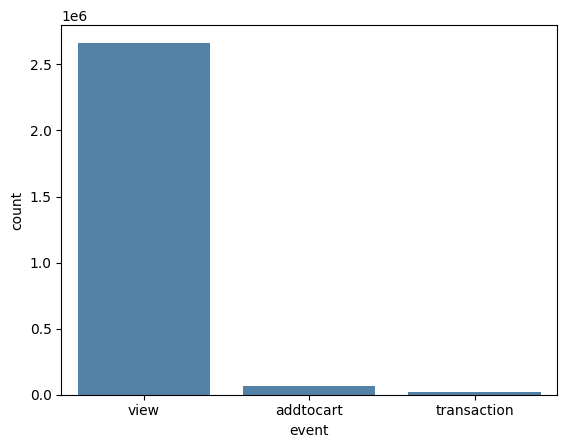

In [43]:
sns.barplot(
    y=df_count['count'],
    x=df_count['event'], 
    color='steelblue')

In [23]:
purchase_df = df.filter(pl.col('event') == 'transaction')
purchase_df.tail()

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1438377176570,1050575,"""transaction""",31640,"""8354"""
1438379878779,861299,"""transaction""",456602,"""3643"""
1438357730123,855941,"""transaction""",235771,"""4385"""
1438355560300,548772,"""transaction""",29167,"""13872"""
1438358989163,1051054,"""transaction""",312728,"""17579"""
